# This example shows how to setup a simple traveling-wave accelerating structure

In [1]:
import RF_Track as RFT
import numpy as np
import matplotlib.pyplot as plt

## Structure parameters

In [2]:
a0 = 1.0 # V/m, principal Fourier coefficient
freq = 12e9 # Hz
ph_adv = 2*np.pi/3 # radian, phase advance per cell
n_cells = 3 # number of cells, negative sign indicates a start from the beginning of the cell

## Create a structure and sets its reference time

In [3]:
TW = RFT.TW_Structure(a0, 0, freq, ph_adv, n_cells)

## Let's plot the field using the method ```Element::get_field(x, y, z, t)```
* $x$, $y$, $z$ are in mm
* $t$ is in mm/$c$

These coordinates can be vectors to get the field at several points in just one call.

In [4]:
E,B = TW.get_field(1, 3, 5, 0)
print(E)
print(B)

[ 0.03875505  0.11626514 -0.95132499]
[-3.87818759e-10  1.29272920e-10  0.00000000e+00]

RF-Track, version 2.3.3a0

Copyright (C) 2016-2025 CERN, Geneva, Switzerland. All rights reserved.

Author and contact:
 Andrea Latina <andrea.latina@cern.ch>
 BE-ABP Group
 CERN
 CH-1211 GENEVA 23
 SWITZERLAND

This software is distributed under a CERN proprietary software
license in the hope that it will be useful, but WITHOUT ANY WARRANTY;
not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

See the COPYRIGHT and LICENSE files at the top-level directory of
the RF-Track download area: https://gitlab.cern.ch/rf-track

RF-Track was compiled with GSL-2.7 and fftw-3.3.10



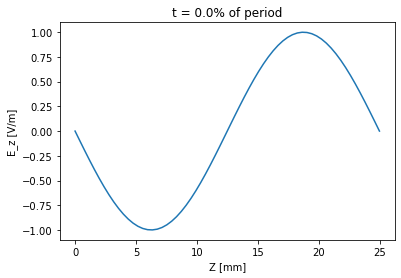

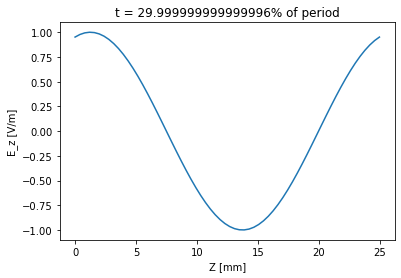

In [ ]:
TW.set_t0(0.0) # set the reference time

T_period = TW.get_period() # mm/c

Z = np.linspace(0, TW.get_length()*1e3, 64) # mm
O = np.zeros(Z.size)
I = np.ones(Z.size)

for t in np.array([0.0,0.3,0.6])*T_period:
    # read the field along the axis
    E, B = TW.get_field(O, O, Z, t*I)
    # plot the field Ez
    plt.figure()
    plt.plot(Z, E[:, 2])
    plt.title('t = {}% of period'.format(t*100/T_period))
    plt.xlabel('Z [mm]')
    plt.ylabel('E_z [V/m]')
    #plt.xlim([0,Z[-1]])
    #plt.ylim([-a0*1.2, a0*1.2])